# Machine learning step by step

## Load

In [1]:
import pandas as pd
from sklearn.datasets import load_iris 

iris = load_iris()                  # Carica il dataset Iris (Formato bunch, simile a dizionario)

X = iris.data                       # X matrix (array)                   
y = iris.target                     # y target (array)
featureName = iris.feature_names    # X columns (list)
targetName = iris.target_names      # y target (list)

# Carica il dataset come DataFrame
irisDf = load_iris(as_frame=True)   
df = irisDf.frame                   # Dataframe

## Train Split

Train_test_split divide in train e in test, vedi come utilizzando stratify che le classi vengono suddivise equamente

In [10]:
from sklearn.model_selection import train_test_split
# Applicazione di stratify e caricamento su df
X_trainS, X_testS, y_trainS, y_testS = train_test_split(df.iloc[:, :4],df.iloc[:, 4], test_size=0.2, random_state=42, stratify=y)  # Stratifica per bilanciare le classi
dfTrainS = pd.concat([X_trainS, y_trainS], axis = 1)
dfTestS = pd.concat([X_testS, y_testS], axis = 1)

# Senza applicazione di stratify e caricamento su df
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :4],df.iloc[:, 4], test_size=0.2, random_state=42)  # Stratifica per bilanciare le classi
dfTrain = pd.concat([X_train, y_train], axis = 1)
dfTest = pd.concat([X_test, y_test], axis = 1)

print(dfTrainS.target.value_counts())
print(dfTestS.target.value_counts())

print(dfTrain.target.value_counts())
print(dfTest.target.value_counts())

target
0    40
2    40
1    40
Name: count, dtype: int64
target
0    10
2    10
1    10
Name: count, dtype: int64
target
1    41
0    40
2    39
Name: count, dtype: int64
target
2    11
0    10
1     9
Name: count, dtype: int64


## Scaler
ci sono differenti tipi di scaler, vengono utilizzati a seconda della distribuzione dei dati

1. **Standard** (Standardizzazione): 

    **Media = 0 , Deviazione standard = 1**

    $
    X' = \frac{X - \mu}{\sigma}
    $



    - Distribuzione gaussiana
    - Maniente gli outlier
    - Regressione lineare / SVM / PCA / K-Means

2. **MinMax** (Normalizzazione): 

    **Valori compresi tra 0 e 1**

    $
    X' = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
    $

    - Distribuzione non gaussiana
    - Utile per dati con valori fissi e limiti noti
    - Evita distorsioni causate da features con scale differenti
    - Reti neurali / k-NN / algoritmi basati su distanza

3. **Robust**: resistente agli outlier

    $
    X' = \frac{X - \text{mediana}}{\text{IQR}}
    $

    - In presenza di forti outlier o per mitigarli
    - Funziona bene con distribuzioni skewed (sbilanciate)

4. **MaxAbs**: dati con segno opposto

    $
    X' = \frac{X}{\max |X|}
    $

    **Dati compresi tra -1 e 1**

    - In presenza di dati con valori negativi (non distorce il segno)
    - Utile per dati sparsi (molti 0), come elaborazione di testi o dataset di deep learning 


**Concetto fondamentale dello scaling**:

Prima si effettua lo scaling su X training, poi su X test utilizzando i paramentri di X training


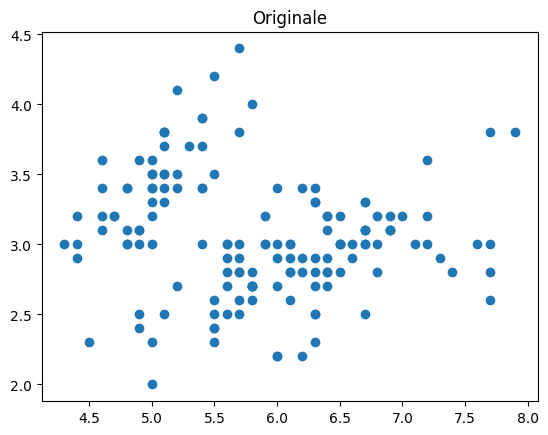

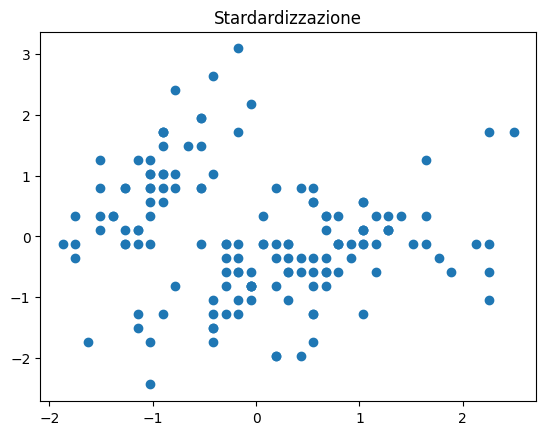

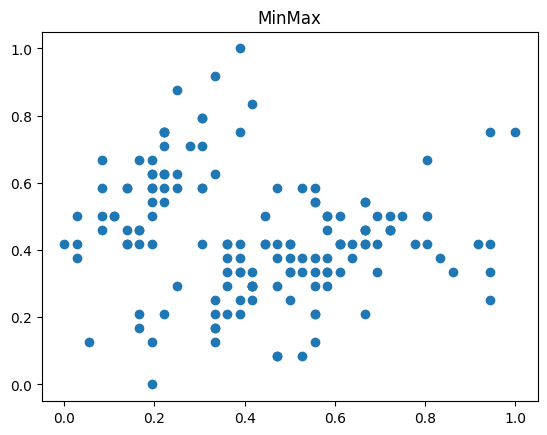

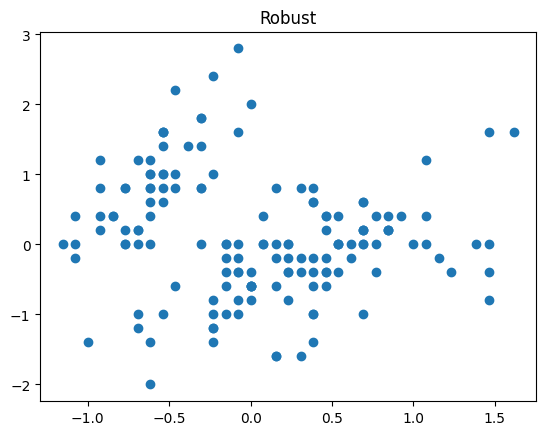

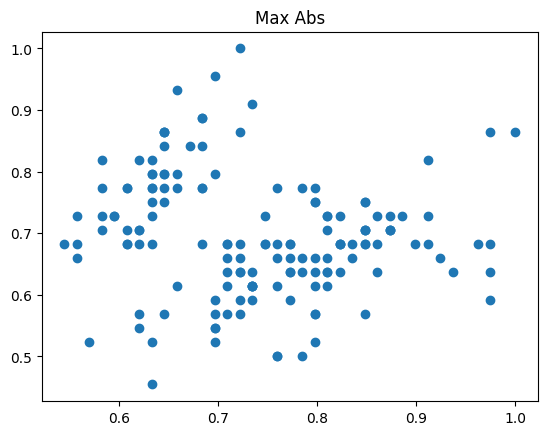

In [22]:
XTemp = X[:,:2]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaledSS = scaler.fit_transform(XTemp)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaledMM = scaler.fit_transform(XTemp)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaledRS = scaler.fit_transform(XTemp)

from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X_scaledMA = scaler.fit_transform(XTemp)

import matplotlib.pyplot as plt
plt.scatter(XTemp[:,0], XTemp[:,1])
plt.title("Originale")
plt.show()
plt.close()

plt.scatter(X_scaledSS[:,0], X_scaledSS[:,1])
plt.title("Stardardizzazione")
plt.show()
plt.close()

plt.scatter(X_scaledMM[:,0], X_scaledMM[:,1])
plt.title("MinMax")
plt.show()
plt.close()

plt.scatter(X_scaledRS[:,0], X_scaledRS[:,1])
plt.title("Robust")
plt.show()
plt.close()

plt.scatter(X_scaledMA[:,0], X_scaledMA[:,1])
plt.title("Max Abs")
plt.show()
plt.close()

## Ricerca parametro ottimale (K)


In [54]:
import numpy as np
param_grid = {'n_neighbors': np.arange(1, 21)}  # Crea un dizionario con valori 1-21 (sono i K da testare)

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=6, scoring='accuracy')
grid_search.fit(X_train, y_train) 
best_k = grid_search.best_params_['n_neighbors'] 

knn = KNeighborsClassifier(n_neighbors=best_k)  # Inizializza il modello con il miglior K
knn.fit(X_train, y_train)  # Addestra il modello

KNeighborsClassifier(n_neighbors=np.int64(3))

In [55]:
import joblib

joblib.dump(knn, 'knn_model.pkl')  # Salva il modello addestrato
joblib.dump(scaler, 'scaler.pkl')  # Salva lo scaler per future previsioni

['scaler.pkl']